# Python Movies Correlation

In [135]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust configuration of the plots we will create

# Read Data

df = pd.read_csv(r"C:\Users\salat\Downloads\movies.csv\movies.csv")

In [ ]:
# Look at data

df.head(10)

In [137]:
#Checking missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [138]:
# Removing missing data
df=df.dropna()
#df.fillna(df.mean(), inplace=True)

In [139]:
# Double check of missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [140]:
# Extracting the released year + (new column yearcorrect)

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(str)

In [141]:
## Data Types for our columns

print(df.dtypes)

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect     object
dtype: object


In [142]:
# Change data type in columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

In [143]:
# Move columns
new_columns = ['budget','company','country','director','genre','gross','name','rating','released','runtime','score','star','votes','writer','year','yearcorrect']
df = df[new_columns]


In [109]:
print(df.dtypes)

budget           int32
company         object
country         object
director        object
genre           object
gross            int32
name            object
rating          object
released        object
runtime        float64
score          float64
star            object
votes          float64
writer          object
year             int64
yearcorrect     object
dtype: object


In [110]:
#change data type 'votes'
df['votes'] = df['votes'].fillna(0).astype(int)
print(df.dtypes)

budget           int32
company         object
country         object
director        object
genre           object
gross            int32
name            object
rating          object
released        object
runtime        float64
score          float64
star            object
votes            int32
writer          object
year             int64
yearcorrect     object
dtype: object


In [144]:
df.sort_values(by = ['gross'], inplace = False,ascending = False)

budget                                            company  \
6663  245000000                                          Lucasfilm   
7244  321000000                                     Marvel Studios   
7480  260000000                               Walt Disney Pictures   
6653  150000000                                 Universal Pictures   
6043  220000000                                     Marvel Studios   
6646  190000000                                 Universal Pictures   
7494  150000000                      Walt Disney Animation Studios   
6644  250000000                                     Marvel Studios   
7247  200000000                                     Marvel Studios   
5845  125000000                                       Warner Bros.   
7075  317000000                               Walt Disney Pictures   
7271  170000000                                 Universal Pictures   
6262  150000000                      Walt Disney Animation Studios   
7072  160000000                                   Mandeville Films   
7281  200000000                               Walt Disney Pictures   
7055  250000000                                 Universal Pictures   
6244  200000000                                     Marvel Studios   
6688   74000000                         Illumination Entertainment   
6846  250000000                                     Marvel Studios   
7250  160000000                                       Warner Bros.   
4245   94000000                                    New Line Cinema   
7458  160000000                                  Columbia Pictures   
7456  160000000                               Walt Disney Pictures   
5878  195000000                                 Paramount Pictures   
6059  200000000                          Metro-Goldwyn-Mayer (MGM)   
6494  210000000                                 Paramount Pictures   
2448   45000000                               Walt Disney Pictures   
6047  250000000                                       Warner Bros.   
7463  275000000                               Walt Disney Pictures   
7450   55000000                                       Warner Bros.   
7488  200000000                            Pixar Animation Studios   
5685  200000000                               Walt Disney Pictures   
4852  225000000                               Walt Disney Pictures   
6869  200000000                                          Lucasfilm   
7481  183000000                               Walt Disney Pictures   
5860  250000000                               Walt Disney Pictures   
7140   80000000                         Illumination Entertainment   
2245   63000000                                 Universal Pictures   
6908  200000000                            Pixar Animation Studios   
3451  115000000                                          Lucasfilm   
5667  200000000                               Walt Disney Pictures   
6863  150000000                               Walt Disney Pictures   
6045  180000000                          Metro-Goldwyn-Mayer (MGM)   
3843  125000000                                       Warner Bros.   
5243  185000000                                       Warner Bros.   
6311   76000000                                 Universal Pictures   
6905  175000000                             Fairview Entertainment   
7051   90000000                                  Columbia Pictures   
6455  250000000                                    New Line Cinema   
5060  300000000                               Walt Disney Pictures   
6253  225000000                          Metro-Goldwyn-Mayer (MGM)   
4048   94000000                                    New Line Cinema   
5051  150000000                                       Warner Bros.   
4259   94000000                            Pixar Animation Studios   
5451  250000000                                       Warner Bros.   
4476  150000000                                Dreamworks Pictures   
7246   52000000    

In [ ]:
pd.set_option('display.max_rows', None)

In [113]:
df = df.sort_values(by = ['gross'], inplace = False,ascending = False)

In [ ]:
# Drop any duplicates

#df['company']=df['company'].drop_duplicates().sort_values(ascending = False)
df.drop_duplicates()

In [ ]:
# Budget high correlation
#Company high correlation

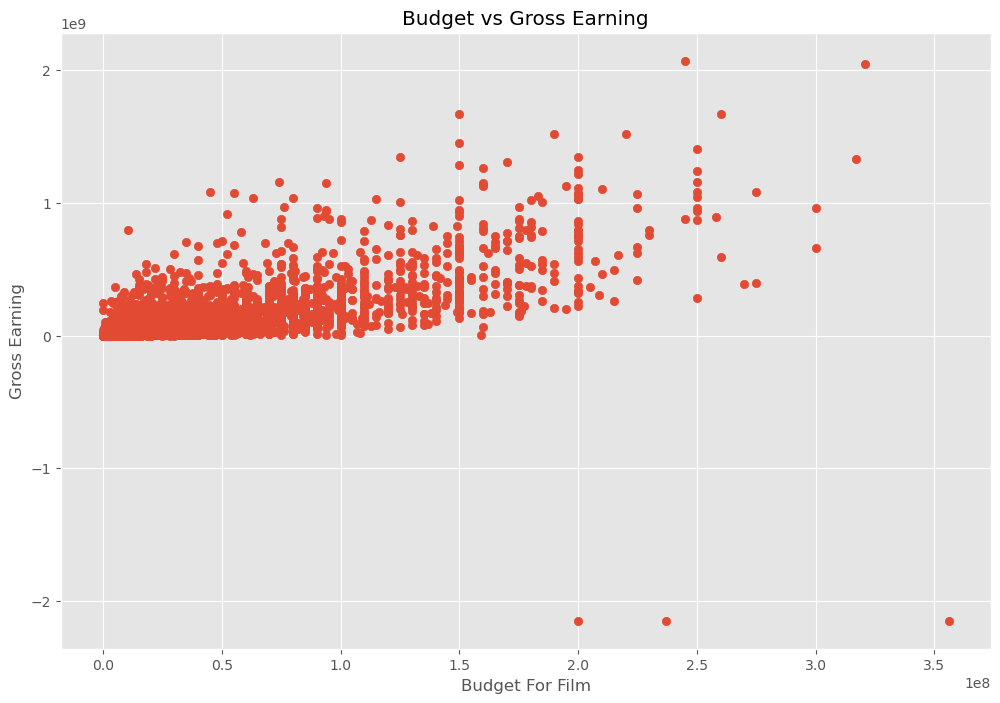

In [116]:
# Scatter plot with budget vs gross 

plt.scatter(x= df['budget'],y = df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earning')

plt.show()

In [117]:
df.head(10)

budget                        company         country  \
6663  245000000                      Lucasfilm   United States   
7244  321000000                 Marvel Studios   United States   
7480  260000000           Walt Disney Pictures   United States   
6653  150000000             Universal Pictures   United States   
6043  220000000                 Marvel Studios   United States   
6646  190000000             Universal Pictures   United States   
7494  150000000  Walt Disney Animation Studios   United States   
6644  250000000                 Marvel Studios   United States   
7247  200000000                 Marvel Studios   United States   
5845  125000000                   Warner Bros.  United Kingdom   

             director      genre       gross  \
6663      J.J. Abrams     Action  2069521700   
7244    Anthony Russo     Action  2048359754   
7480      Jon Favreau  Animation  1670727580   
6653  Colin Trevorrow     Action  1670516444   
6043      Joss Whedon     Action  1518815515   
6646        James Wan     Action  1515341399   
7494       Chris Buck  Animation  1450026933   
6644      Joss Whedon     Action  1402809540   
7247     Ryan Coogler     Action  1347597973   
5845      David Yates  Adventure  1342321665   

                                              name rating  \
6663    Star Wars: Episode VII - The Force Awakens  PG-13   
7244                        Avengers: Infinity War  PG-13   
7480                                 The Lion King     PG   
6653                                Jurassic World  PG-13   
6043                                  The Avengers  PG-13   
6646                                     Furious 7  PG-13   
7494                                     Frozen II     PG   
6644                       Avengers: Age of Ultron  PG-13   
7247                                 Black Panther  PG-13   
5845  Harry Potter and the Deathly Hallows: Part 2  PG-13   

                               released  runtime  score               star  \
6663  December 18, 2015 (United States)    138.0    7.8       Daisy Ridley   
7244     April 27, 2018 (United States)    149.0    8.4  Robert Downey Jr.   
7480      July 19, 2019 (United States)    118.0    6.9      Donald Glover   
6653      June 12, 2015 (United States)    124.0    7.0        Chris Pratt   
6043        May 4, 2012 (United States)    143.0    8.0  Robert Downey Jr.   
6646      April 3, 2015 (United States)    137.0    7.1         Vin Diesel   
7494  November 22, 2019 (United States)    103.0    6.8       Kristen Bell   
6644        May 1, 2015 (United States)    141.0    7.3  Robert Downey Jr.   
7247  February 16, 2018 (United States)    134.0    7.3   Chadwick Boseman   
5845      July 15, 2011 (United States)    130.0    8.1   Daniel Radcliffe   

        votes              writer  year yearcorrect  
6663   876000     Lawrence Kasdan  2015        2015  
7244   897000  Christopher Markus  2018        2018  
7480   222000      Jeff Nathanson  2019        2019  
6653   593000          Rick Jaffa  2015        2015  
6043  1300000         Joss Whedon  2012        2012  
6646   370000        Chris Morgan  2015        2015  
7494   148000        Jennifer Lee  2019        2019  
6644   777000         Joss Whedon  2015        2015  
7247   661000        Ryan Coogler  2018        2018  
5845   790000        Steve Kloves  2011        2011

In [118]:
#Apply N/A to negative budget
df['budget'] = df['budget'].apply(lambda x: np.nan if x < 0 else x)

In [119]:
#Apply N/A to negative budget
df['gross'] = df['gross'].apply(lambda x: np.nan if x < 0 else x)

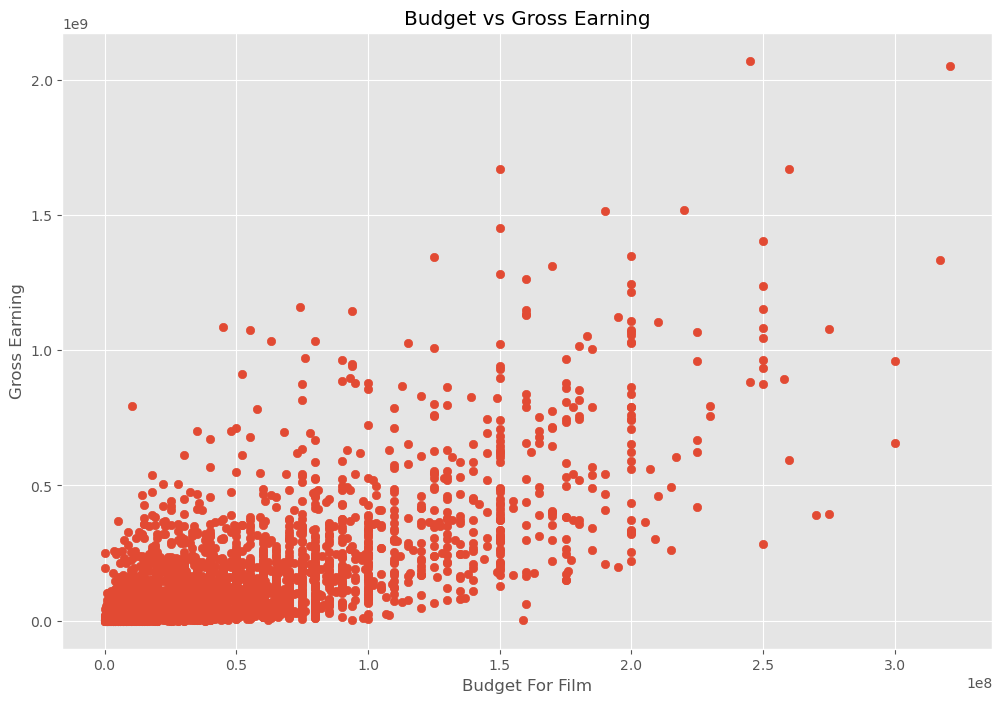

In [120]:
# Scatter plot with budget vs gross 

plt.scatter(x= df['budget'],y = df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earning')

plt.show()

In [121]:
df.head(10)

budget                        company         country  \
6663  245000000                      Lucasfilm   United States   
7244  321000000                 Marvel Studios   United States   
7480  260000000           Walt Disney Pictures   United States   
6653  150000000             Universal Pictures   United States   
6043  220000000                 Marvel Studios   United States   
6646  190000000             Universal Pictures   United States   
7494  150000000  Walt Disney Animation Studios   United States   
6644  250000000                 Marvel Studios   United States   
7247  200000000                 Marvel Studios   United States   
5845  125000000                   Warner Bros.  United Kingdom   

             director      genre         gross  \
6663      J.J. Abrams     Action  2.069522e+09   
7244    Anthony Russo     Action  2.048360e+09   
7480      Jon Favreau  Animation  1.670728e+09   
6653  Colin Trevorrow     Action  1.670516e+09   
6043      Joss Whedon     Action  1.518816e+09   
6646        James Wan     Action  1.515341e+09   
7494       Chris Buck  Animation  1.450027e+09   
6644      Joss Whedon     Action  1.402810e+09   
7247     Ryan Coogler     Action  1.347598e+09   
5845      David Yates  Adventure  1.342322e+09   

                                              name rating  \
6663    Star Wars: Episode VII - The Force Awakens  PG-13   
7244                        Avengers: Infinity War  PG-13   
7480                                 The Lion King     PG   
6653                                Jurassic World  PG-13   
6043                                  The Avengers  PG-13   
6646                                     Furious 7  PG-13   
7494                                     Frozen II     PG   
6644                       Avengers: Age of Ultron  PG-13   
7247                                 Black Panther  PG-13   
5845  Harry Potter and the Deathly Hallows: Part 2  PG-13   

                               released  runtime  score               star  \
6663  December 18, 2015 (United States)    138.0    7.8       Daisy Ridley   
7244     April 27, 2018 (United States)    149.0    8.4  Robert Downey Jr.   
7480      July 19, 2019 (United States)    118.0    6.9      Donald Glover   
6653      June 12, 2015 (United States)    124.0    7.0        Chris Pratt   
6043        May 4, 2012 (United States)    143.0    8.0  Robert Downey Jr.   
6646      April 3, 2015 (United States)    137.0    7.1         Vin Diesel   
7494  November 22, 2019 (United States)    103.0    6.8       Kristen Bell   
6644        May 1, 2015 (United States)    141.0    7.3  Robert Downey Jr.   
7247  February 16, 2018 (United States)    134.0    7.3   Chadwick Boseman   
5845      July 15, 2011 (United States)    130.0    8.1   Daniel Radcliffe   

        votes              writer  year yearcorrect  
6663   876000     Lawrence Kasdan  2015        2015  
7244   897000  Christopher Markus  2018        2018  
7480   222000      Jeff Nathanson  2019        2019  
6653   593000          Rick Jaffa  2015        2015  
6043  1300000         Joss Whedon  2012        2012  
6646   370000        Chris Morgan  2015        2015  
7494   148000        Jennifer Lee  2019        2019  
6644   777000         Joss Whedon  2015        2015  
7247   661000        Ryan Coogler  2018        2018  
5845   790000        Steve Kloves  2011        2011

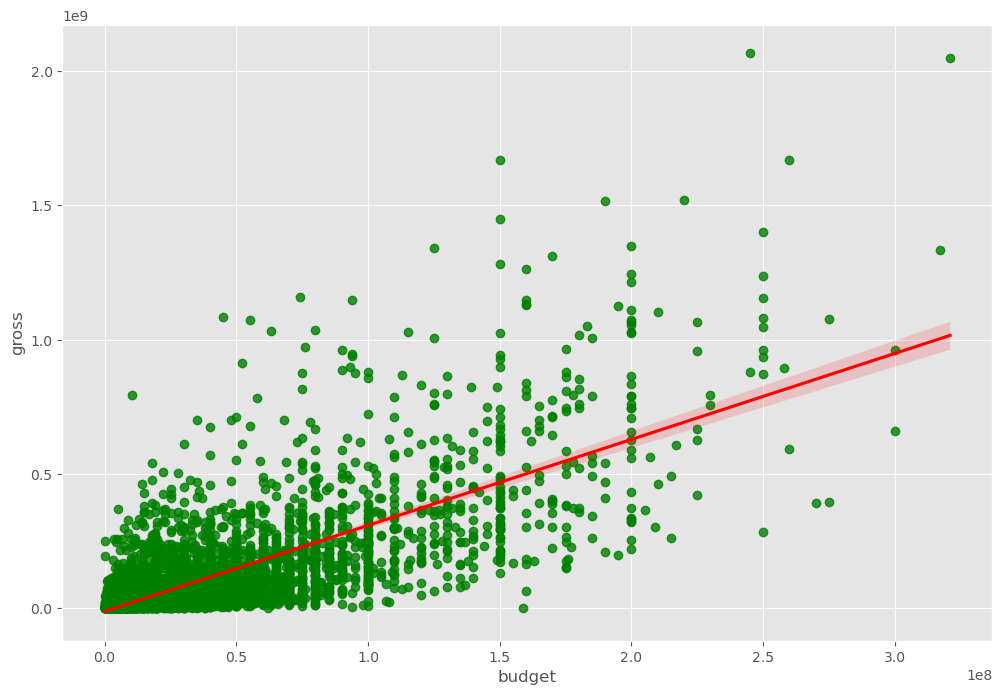

In [122]:
# Plot the Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "green"},line_kws={"color":"red"})
plt.show()

In [123]:
#Looking at correlation

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for numeric columns  #pearon(default),kendall,spearman
correlation_matrix = numeric_df.corr(method='pearson')

print(correlation_matrix)

           budget     gross   runtime     score     votes      year
budget   1.000000  0.743536  0.318695  0.072001  0.439675  0.327722
gross    0.743536  1.000000  0.261947  0.221701  0.613791  0.283780
runtime  0.318695  0.261947  1.000000  0.414068  0.352303  0.075077
score    0.072001  0.221701  0.414068  1.000000  0.474256  0.056386
votes    0.439675  0.613791  0.352303  0.474256  1.000000  0.206021
year     0.327722  0.283780  0.075077  0.056386  0.206021  1.000000


In [ ]:
#High correlation between budget and gross

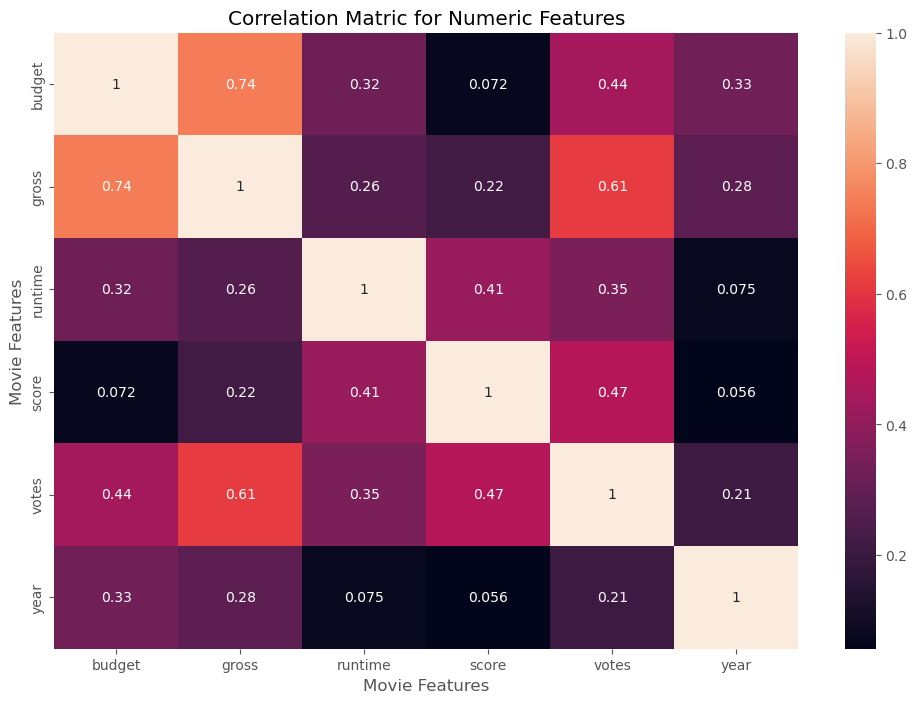

In [124]:
# Visualization of correlation_matrix

sns.heatmap(correlation_matrix,annot =True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [145]:
# Look at Company
df.head()

budget             company         country         director      genre  \
0  19000000        Warner Bros.  United Kingdom  Stanley Kubrick      Drama   
1   4500000   Columbia Pictures   United States   Randal Kleiser  Adventure   
2  18000000           Lucasfilm   United States   Irvin Kershner     Action   
3   3500000  Paramount Pictures   United States     Jim Abrahams     Comedy   
4   6000000      Orion Pictures   United States     Harold Ramis     Comedy   

       gross                                            name rating  \
0   46998772                                     The Shining      R   
1   58853106                                 The Blue Lagoon      R   
2  538375067  Star Wars: Episode V - The Empire Strikes Back     PG   
3   83453539                                       Airplane!     PG   
4   39846344                                      Caddyshack      R   

                        released  runtime  score            star      votes  \
0  June 13, 1980 (United States)    146.0    8.4  Jack Nicholson   927000.0   
1   July 2, 1980 (United States)    104.0    5.8  Brooke Shields    65000.0   
2  June 20, 1980 (United States)    124.0    8.7     Mark Hamill  1200000.0   
3   July 2, 1980 (United States)     88.0    7.7     Robert Hays   221000.0   
4  July 25, 1980 (United States)     98.0    7.3     Chevy Chase   108000.0   

                    writer  year yearcorrect  
0             Stephen King  1980        1980  
1  Henry De Vere Stacpoole  1980        1980  
2           Leigh Brackett  1980        1980  
3             Jim Abrahams  1980        1980  
4       Brian Doyle-Murray  1980        1980

In [ ]:
# Using factorize - this assigns a random numeric value for each unique categorical value

#df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

In [ ]:
df_numerized = df 

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
df_numerized.head(10)

In [ ]:
df_numerized.sort_values(by = ['gross'], inplace = False,ascending = False)

In [148]:
df_numerized.head(10)

budget  company  country  director  genre      gross  name  rating  \
0  19000000     1426       46      1795      6   46998772  4692       6   
1   4500000      452       47      1578      1   58853106  3929       6   
2  18000000      945       47       757      0  538375067  3641       4   
3   3500000     1108       47       889      4   83453539   204       4   
4   6000000     1083       47       719      4   39846344   732       6   
5    550000     1108       47      1758      9   39754601  1509       6   
6  27000000     1397       47       974      0  115229890  3930       6   
7  18000000      390       47      1269      3   23402427  3122       6   
8  54000000      548       47      1606      0  108185706  3732       4   
9  10000000     1391       47      2011      3   15795189  4401       6   

   released  runtime  score  star      votes  writer  year  yearcorrect  
0      1304    146.0    8.4   699   927000.0    2832  1980            0  
1      1127    104.0    5.8   214    65000.0    1158  1980            0  
2      1359    124.0    8.7  1157  1200000.0    1818  1980            0  
3      1127     88.0    7.7  1474   221000.0    1413  1980            0  
4      1170     98.0    7.3   271   108000.0     351  1980            0  
5      1922     95.0    6.4   155   123000.0    3081  1980            0  
6      1359    133.0    7.9   860   188000.0     576  1980            0  
7       530    129.0    8.2  1469   330000.0    1257  1980            0  
8      1346    127.0    6.8   595   101000.0    1402  1980            1  
9      1755    100.0    7.0   402    10000.0     280  1980            0

In [149]:
df.head(10)

budget  company  country  director  genre      gross  name  rating  \
0  19000000     1426       46      1795      6   46998772  4692       6   
1   4500000      452       47      1578      1   58853106  3929       6   
2  18000000      945       47       757      0  538375067  3641       4   
3   3500000     1108       47       889      4   83453539   204       4   
4   6000000     1083       47       719      4   39846344   732       6   
5    550000     1108       47      1758      9   39754601  1509       6   
6  27000000     1397       47       974      0  115229890  3930       6   
7  18000000      390       47      1269      3   23402427  3122       6   
8  54000000      548       47      1606      0  108185706  3732       4   
9  10000000     1391       47      2011      3   15795189  4401       6   

   released  runtime  score  star      votes  writer  year  yearcorrect  
0      1304    146.0    8.4   699   927000.0    2832  1980            0  
1      1127    104.0    5.8   214    65000.0    1158  1980            0  
2      1359    124.0    8.7  1157  1200000.0    1818  1980            0  
3      1127     88.0    7.7  1474   221000.0    1413  1980            0  
4      1170     98.0    7.3   271   108000.0     351  1980            0  
5      1922     95.0    6.4   155   123000.0    3081  1980            0  
6      1359    133.0    7.9   860   188000.0     576  1980            0  
7       530    129.0    8.2  1469   330000.0    1257  1980            0  
8      1346    127.0    6.8   595   101000.0    1402  1980            1  
9      1755    100.0    7.0   402    10000.0     280  1980            0

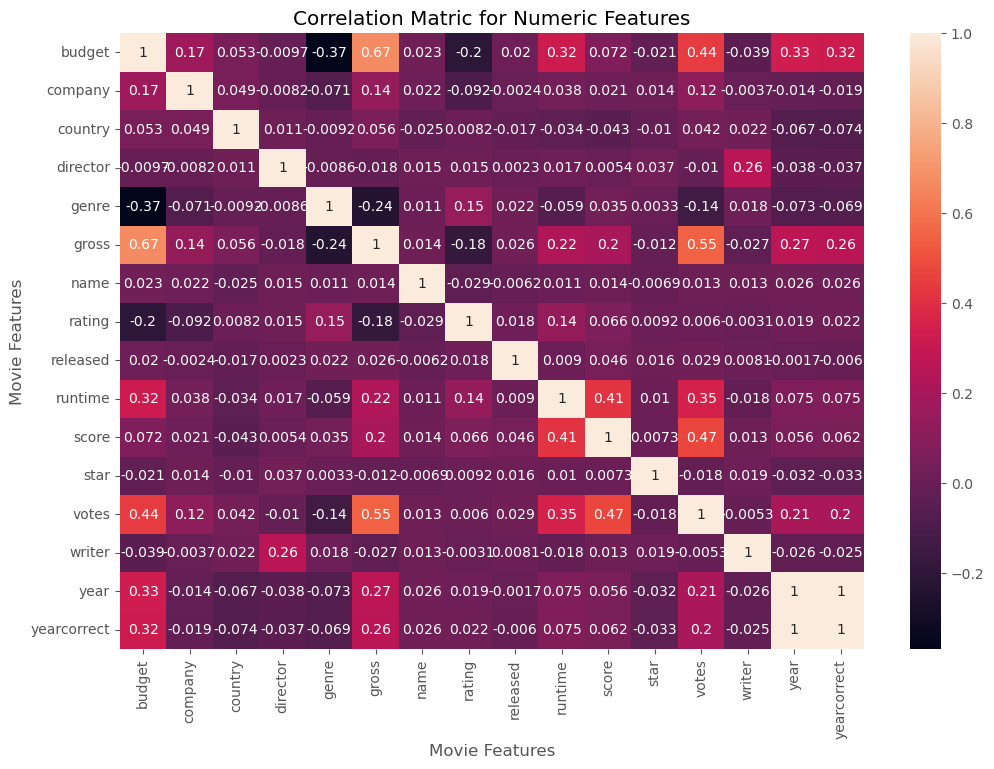

               budget   company   country  director     genre     gross  \
budget       1.000000  0.170235  0.052977 -0.009662 -0.368523  0.669203   
company      0.170235  1.000000  0.048569 -0.008223 -0.071334  0.140055   
country      0.052977  0.048569  1.000000  0.011133 -0.009164  0.055859   
director    -0.009662 -0.008223  0.011133  1.000000 -0.008553 -0.017821   
genre       -0.368523 -0.071334 -0.009164 -0.008553  1.000000 -0.238629   
gross        0.669203  0.140055  0.055859 -0.017821 -0.238629  1.000000   
name         0.023392  0.021697 -0.025490  0.015246  0.010996  0.014073   
rating      -0.203946 -0.092357  0.008230  0.014656  0.147796 -0.180805   
released     0.019952 -0.002407 -0.017228  0.002308  0.022142  0.025636   
runtime      0.318695  0.037585 -0.034477  0.017433 -0.059237  0.223667   
score        0.072001  0.020656 -0.043051  0.005413  0.035106  0.201086   
star        -0.021473  0.014082 -0.009990  0.036593  0.003341 -0.011854   
votes        0.439675  0.

In [150]:
# Calculate the correlation matrix for numeric columns  #pearon(default),kendall,spearman
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix,annot =True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()


print(correlation_matrix)

In [153]:
# Filter down 
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company        0.170235
             country        0.052977
             director      -0.009662
             genre         -0.368523
             gross          0.669203
             name           0.023392
             rating        -0.203946
             released       0.019952
             runtime        0.318695
             score          0.072001
             star          -0.021473
             votes          0.439675
             writer        -0.039466
             year           0.327722
             yearcorrect    0.320312
company      budget         0.170235
             company        1.000000
             country        0.048569
             director      -0.008223
             genre         -0.071334
             gross          0.140055
             name           0.021697
             rating        -0.092357
             released      -0.002407
             runtime        0.037585
             score          0.020656
 

In [155]:
sorted_pairs = corr_pairs.sort_values()6
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.238629
gross        genre         -0.238629
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.180805
gross        rating        -0.180805
votes        genre         -0.135990
genre        votes         -0.135990
rating       company       -0.092357
company      rating        -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
genre        year          -0.073167
year         genre         -0.073167
genre        company       -0.071334
company      genre         -0.071334
yearcorrect  genre         -0.069147
genre        yearcorrect   -0.069147
year         country       -0.066748
country      year          -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
country      score         -0.043051
score        country       -0.043051
writer       budget        -0.039466
b

In [158]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]
high_corr

votes        gross          0.550649
gross        votes          0.550649
             budget         0.669203
budget       gross          0.669203
yearcorrect  year           0.998726
year         yearcorrect    0.998726
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and gross have a high correlation. As the number of votes increases, the gross earnings tend to increase as well.
# Budget and gross have a high correlation. This suggests that movies with higher budgets tend to have higher gross earnings.
# Self-Correlation(1.00..)All variables are perfectly correlated with themselves, as expected.